# Imports & Packages

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # color map

import numpy as np
from sympy import symbols, diff

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1: Simple Cost Function

# $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
def df(x):
    return 2*x + 1

In [4]:
# Make Data 
x1 = np.linspace(start=-3, stop=3, num=500)

In [5]:
print(x1)

[-3.         -2.98797595 -2.9759519  -2.96392786 -2.95190381 -2.93987976
 -2.92785571 -2.91583166 -2.90380762 -2.89178357 -2.87975952 -2.86773547
 -2.85571142 -2.84368737 -2.83166333 -2.81963928 -2.80761523 -2.79559118
 -2.78356713 -2.77154309 -2.75951904 -2.74749499 -2.73547094 -2.72344689
 -2.71142285 -2.6993988  -2.68737475 -2.6753507  -2.66332665 -2.65130261
 -2.63927856 -2.62725451 -2.61523046 -2.60320641 -2.59118236 -2.57915832
 -2.56713427 -2.55511022 -2.54308617 -2.53106212 -2.51903808 -2.50701403
 -2.49498998 -2.48296593 -2.47094188 -2.45891784 -2.44689379 -2.43486974
 -2.42284569 -2.41082164 -2.3987976  -2.38677355 -2.3747495  -2.36272545
 -2.3507014  -2.33867735 -2.32665331 -2.31462926 -2.30260521 -2.29058116
 -2.27855711 -2.26653307 -2.25450902 -2.24248497 -2.23046092 -2.21843687
 -2.20641283 -2.19438878 -2.18236473 -2.17034068 -2.15831663 -2.14629259
 -2.13426854 -2.12224449 -2.11022044 -2.09819639 -2.08617234 -2.0741483
 -2.06212425 -2.0501002  -2.03807615 -2.0260521  -2.

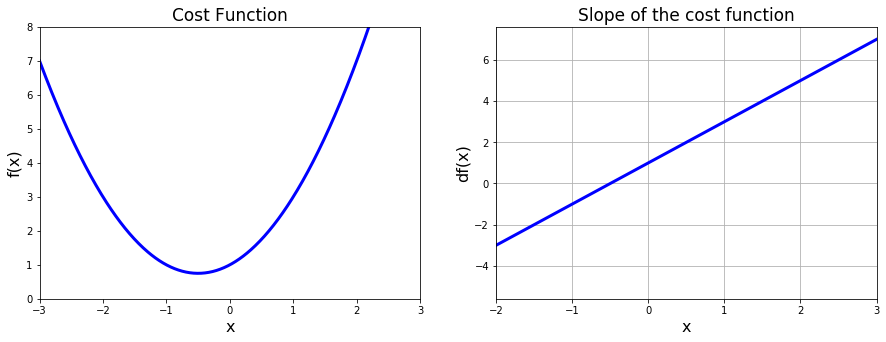

In [6]:
# Plot function & derivative side by side
plt.figure(figsize=(15,5))

# 1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x1, f(x1), c='blue', linewidth=3)

# 2 Chart: Derivative 
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2,3)

plt.plot(x1, df(x1), c='blue', linewidth=3)

# Gradient Descent

In [7]:
new_x = 3
previous_x = 0
step_multiplier = 0.1 
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]


for n in range(500):
    previous_x = new_x 
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print(f'Loop Executions: {n}')
        break
    
print('Local Minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))

Loop Executions: 50
Local Minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


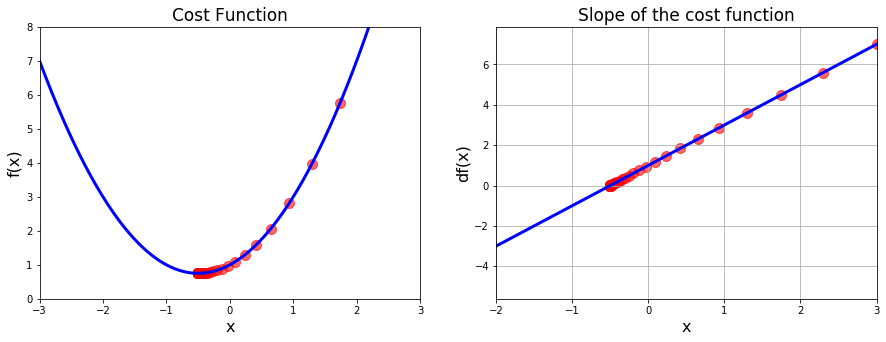

In [8]:
# Superimpose the gradient descent calculations on plot 

plt.figure(figsize=(15,5))

# 1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x1, f(x1), c='blue', linewidth=3)

x_vals_array = np.array(x_list)
plt.scatter(x_list, f(x_vals_array), c='red', s=100, alpha=0.6)

# 2 Chart: Derivative 
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2,3)

plt.plot(x1, df(x1), c='blue', linewidth=3)
plt.scatter(x_list, df(x_vals_array), c='red', s=100, alpha=0.6)

# Example 2: Multiple Minima & Initial Guess

## $$g(x) = x^4 - 4x^2 +5$$

In [9]:
# Make Some Data 
x2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x


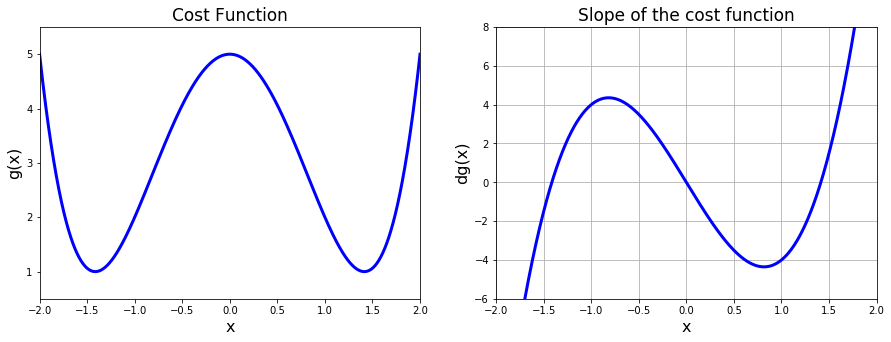

In [10]:
# Superimpose the gradient descent calculations on plot 

plt.figure(figsize=(15,5))

# 1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x2, g(x2), c='blue', linewidth=3)

x_vals_array = np.array(x_list)
#plt.scatter(x_list, f(x_vals_array), c='red', s=100, alpha=0.6)

# 2 Chart: Derivative 
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.plot(x2, dg(x2), c='blue', linewidth=3)
#plt.scatter(x_list, df(x_vals_array), c='red', s=100, alpha=0.6)

In [11]:
def gradient_descent(derivative, initial_guess, 
                     learning_rate=0.02, 
                     precision=0.001, max_iter=300):
    """
        derivative - derivative to apply gradient descent
        initial_guess - initial guess to begin gradient descent 
        multiplier - learning rate 
        precision - when the x changes are too small
    """
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative(new_x)]

    for n in range(max_iter):
        previous_x = new_x 
        gradient = derivative(previous_x)
        new_x = previous_x - learning_rate * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative(new_x))

        if step_size < precision:
            break
        
    return new_x, x_list, slope_list 

In [12]:
local_min, list_x, gradient_list = gradient_descent(dg, 0.5)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  1.4122375085019094
Number of steps:  23


In [13]:
local_min, list_x, gradient_list = gradient_descent(dg, -0.1)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4120887490901561
Number of steps:  34


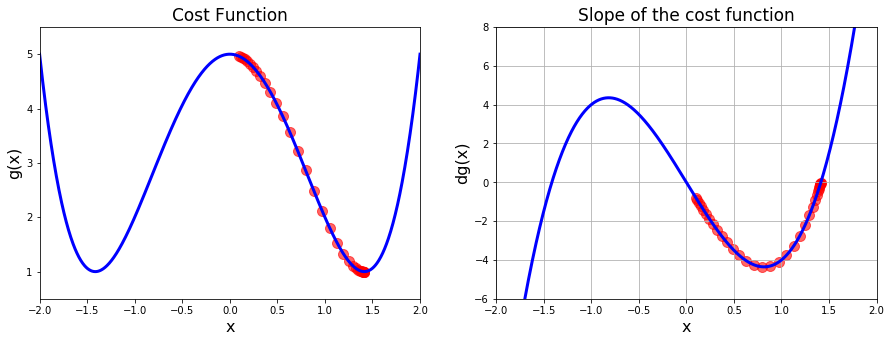

In [14]:
# Calling GD Function
local_min, list_x, gradient_list = gradient_descent(dg, 0.1)

# plot function, derivative, and scater plot side by side 

plt.figure(figsize=(15,5))

# 1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x2, g(x2), c='blue', linewidth=3)

x_vals_array = np.array(list_x)
plt.scatter(list_x, g(x_vals_array), c='red', s=100, alpha=0.6)

# 2 Chart: Derivative 
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.plot(x2, dg(x2), c='blue', linewidth=3)
plt.scatter(list_x, dg(x_vals_array), c='red', s=100, alpha=0.6)

# Example 3 - Divergence & Overflow
## $$h(x) = x^5- 2x^4 + 2$$


In [15]:
# Make Data

x3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2 

def dh(x):
    return 5*x**4 - 8*x**3 

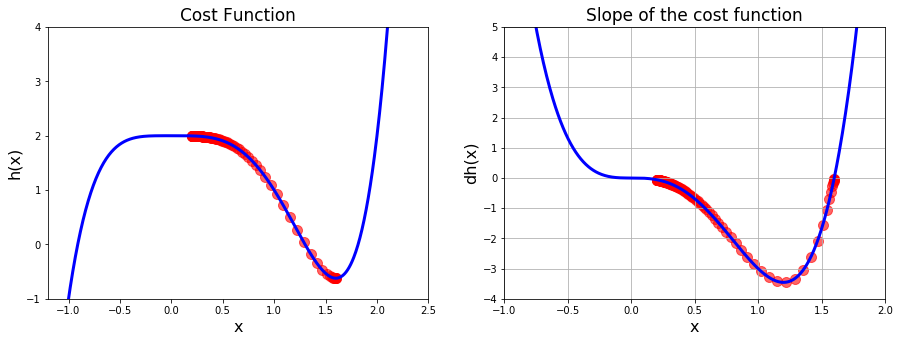

Local Min At:  1.5989534547394717
Cost At Min:  -0.6214287992331258
Number of steps:  117


In [16]:
# Calling GD Function
local_min, list_x, gradient_list = gradient_descent(dh, 0.2)

# plot function, derivative, and scater plot side by side 

plt.figure(figsize=(15,5))

# 1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x3, h(x3), c='blue', linewidth=3)

x_vals_array = np.array(list_x)
plt.scatter(list_x, h(x_vals_array), c='red', s=100, alpha=0.6)

# 2 Chart: Derivative 
plt.subplot(1,2,2)

plt.xlim(-1,2)
plt.ylim(-4,5)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()

plt.plot(x3, dh(x3), c='blue', linewidth=3)
plt.scatter(list_x, dh(x_vals_array), c='red', s=100, alpha=0.6)
plt.show()

print('Local Min At: ', local_min)
print('Cost At Min: ', h(local_min))
print('Number of steps: ', len(list_x))

In [17]:
import sys 
sys.float_info.max

1.7976931348623157e+308

# Learning Rate 

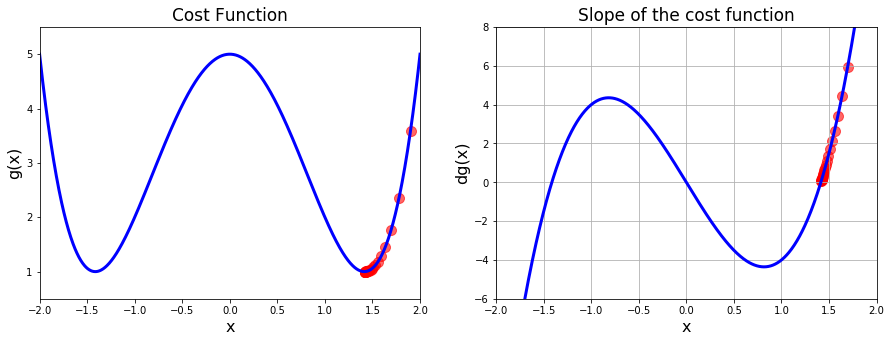

Number of steps:  25


In [18]:
# Calling GD Function
local_min, list_x, gradient_list = gradient_descent(dg, initial_guess=1.9,
                                                   learning_rate=0.01, 
                                                   max_iter=500)

# plot function, derivative, and scater plot side by side 

plt.figure(figsize=(15,5))

# 1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x2, g(x2), c='blue', linewidth=3)

x_vals_array = np.array(list_x)
plt.scatter(list_x, g(x_vals_array), c='red', s=100, alpha=0.6)

# 2 Chart: Derivative 
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.plot(x2, dg(x2), c='blue', linewidth=3)
plt.scatter(list_x, dg(x_vals_array), c='red', s=100, alpha=0.6)
plt.show()


print('Number of steps: ', len(list_x))

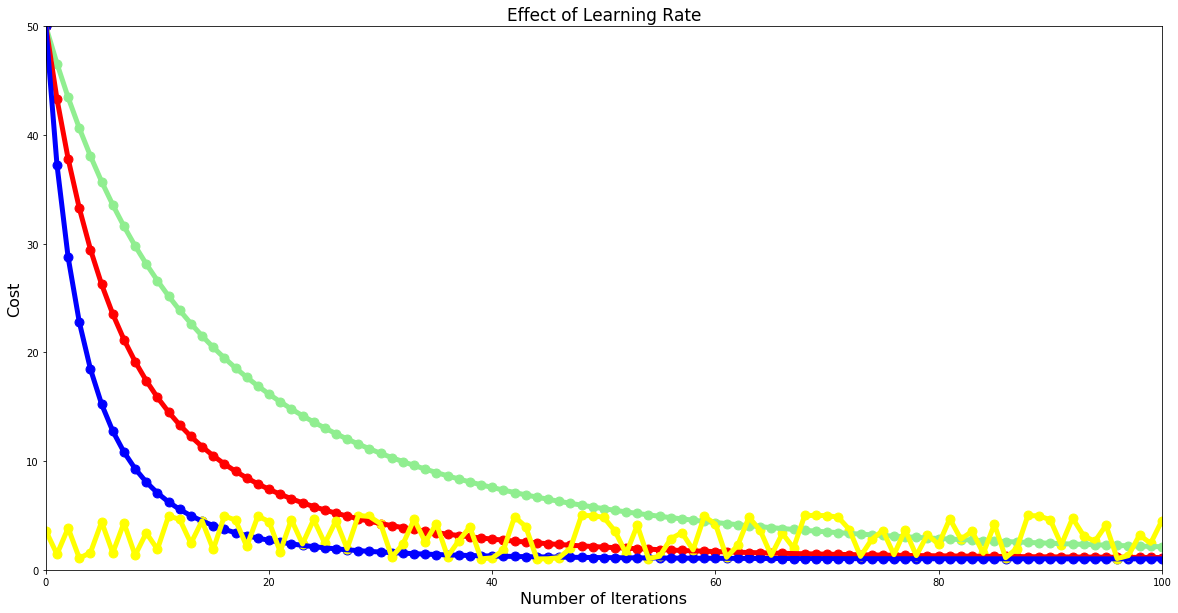

In [19]:
# Run GD 3 Times
n = 100
low_gamma = gradient_descent(dg, initial_guess=3, learning_rate=0.0005, 
                             precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(dg, initial_guess=3, learning_rate=0.001, 
                             precision=0.0001, max_iter=n)
high_gamma = gradient_descent(dg, initial_guess=3, learning_rate=0.002, 
                             precision=0.0001, max_iter=n)
insane_gamma = gradient_descent(dg, initial_guess=1.9, learning_rate=0.25, 
                             precision=0.0001, max_iter=n)
                             
                             
# Plotting reduction in cost for each iteration 
plt.figure(figsize=(20,10))

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of Learning Rate', fontsize=17)
plt.xlabel('Number of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for charts

# 1. Y Axis Data: Convert Lists To np array
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
# 2. X Axis Data: Create A List from 0 to n+1
iteration_list = list(range(0,n+1))

# Plot low learning rate
plt.plot(iteration_list, g(low_values), c='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), c='lightgreen', s=80)

# Plot mid learning rate
plt.plot(iteration_list, g(mid_values), c='red', linewidth=5)
plt.scatter(iteration_list, g(mid_values), c='red', s=80)

# Plot high learning rate
plt.plot(iteration_list, g(high_values), c='blue', linewidth=5)
plt.scatter(iteration_list, g(high_values), c='blue', s=80)

# Plot insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), c='yellow', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), c='yellow', s=80)
plt.show()

# Example 4 - Data Viz With 3D Charts

## Minimize $$f(x,y) = \frac{1}{3^{-x^2 -y^2} + 1}$$

Minimize $$f(x,y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 -y^2}$

In [20]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [21]:
# Make x and y data
x4 = np.linspace(start=-2, stop=2, num=200)
y4 = np.linspace(start=-2, stop=2, num=200)
# 1D array is a vector
print('Shape of X array', x4.shape)

x4, y4 = np.meshgrid(x4,y4)
print('Array after meshgrid: ', x4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


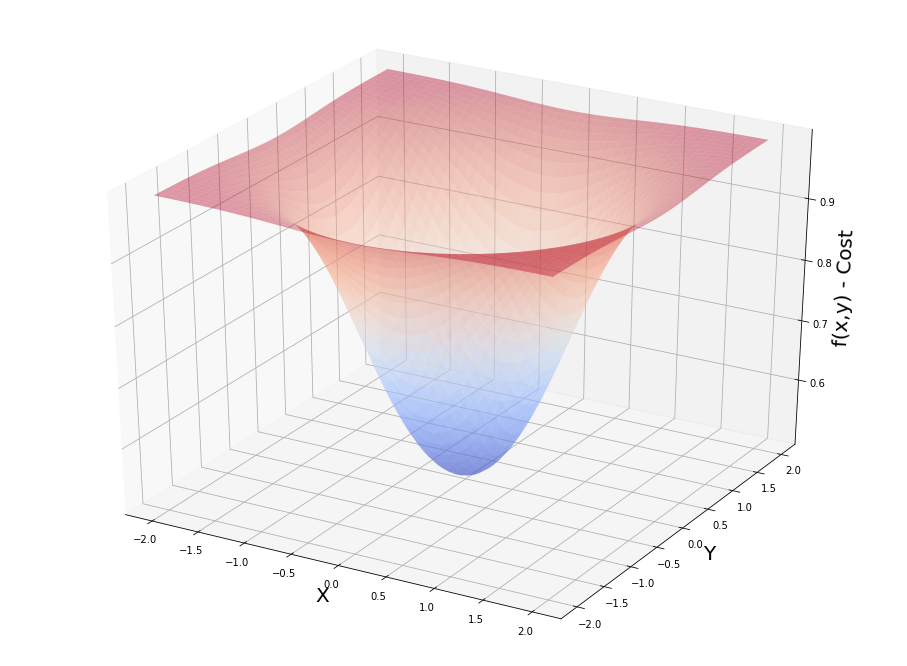

In [22]:
# Generating 3d plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x4,y4,f(x4,y4), cmap=cm.coolwarm, alpha=0.4)
plt.show()

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln3 \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln3 \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$$

In [23]:
a, b = symbols('x, y')
df_a = diff(f(a,b), a)
df_b = diff(f(a,b), b)

print('Cost func f(x, y) is: ', f(a,b))
print('Partial Derivative wrt x: ', df_a)
print('Partial Derivative wrt y: ', df_b)

Cost func f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial Derivative wrt x:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial Derivative wrt y:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2


In [24]:
f(a,b).evalf(subs={a:1.8, b:1.0})

0.990604794032582

In [25]:
df_a.evalf(subs={a:1.8, b:1.0})

0.0368089716197505

# Batch Gradient Descent With sympy

In [26]:
# Setup 
learning_rate = 0.1
max_iter = 200
params = np.array([1.8, 1.0])

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0],b:params[1]})
    gradient = np.array([gradient_x, gradient_y])
    params = params - learning_rate * gradient 
    

# Results 
print('Values in gradient array: ', gradient)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('Cost is: ', f(params[0],params[1]))

Values in gradient array:  [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
Cost is:  0.500000226534985


In [27]:
def fpx(x,y):
    r = 3**(-x**2-y**2)
    return (2*x*np.log(3)*r)/(r+1)**2

def fpy(x,y):
    r = 3**(-x**2-y**2)
    return (2*y*np.log(3)*r)/(r+1)**2

params = np.array([1.8, 1.0])

In [28]:
# Setup 
learning_rate = 0.1
max_iter = 200
params = np.array([1.8, 1.0])

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradient = np.array([gradient_x, gradient_y])
    params = params - learning_rate * gradient 
    

# Results 
print('Values in gradient array: ', gradient)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('Cost is: ', f(params[0],params[1]))

Values in gradient array:  [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
Cost is:  0.5000002265349848


## Graphing 3D GD & Numpy N-D Arrays

In [29]:
# Setup 
learning_rate = 0.1
max_iter = 200
params = np.array([1.8, 1.0])
values_array = params.reshape([1,2])

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradient = np.array([gradient_x, gradient_y])
    params = params - learning_rate * gradient 
    
    # Two ways to update the values array
    # 1.
    #values_array = np.append(values_array, params.reshape([1,2]), axis=0)
    # 2. 
    values_array = np.concatenate((values_array, 
                                   params.reshape([1,2])),
                                   axis=0)

# Results 
print('Values in gradient array: ', gradient)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('Cost is: ', f(params[0],params[1]))
#print(values_array)

Values in gradient array:  [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
Cost is:  0.5000002265349848


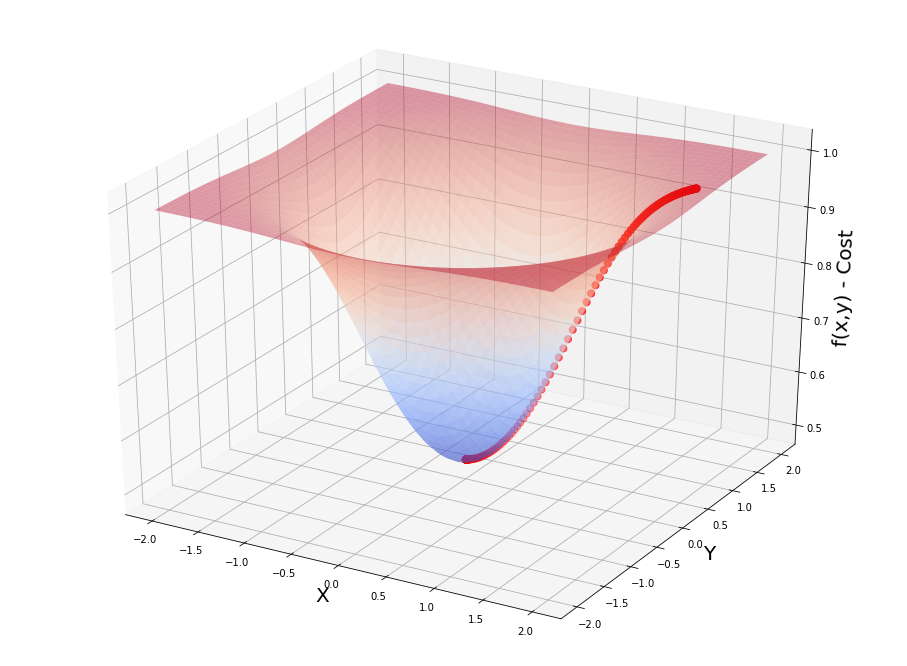

In [30]:
# Generating 3d plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x4,y4,f(x4,y4), cmap=cm.coolwarm, alpha=0.4)

x_vals = values_array[:, 0]
y_vals = values_array[:, 1]
ax.scatter(x_vals, y_vals, f(x_vals,y_vals), s=50, color="red")

plt.show()

# Example 5: Real Cost Function MSE
##### Residual Sum of Squares Interpretation: How much of the dependent
##### variable's variation our model did not explain explain.

## RSS
## $$RSS = \frac{1}{n}\sum \big(y^{(i)}-h_{\theta} x^{(i)}\big)^2 $$

## Mean Squared Error is the mean of RSS
## $$MSE = \frac{1}{n}\sum \big(y-\hat{y} \big)^2 $$

##### Why is MSE more useful than RSS? Well, what happens when dataset is large?
###### the sum of the residuals keeps growing and dividing by the mean allows us 
###### to control the size of the sum and avoid the overflow error. 

In [31]:
# Make Sample Data

x5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

print('X array shape: \n', x5)
print('y array shape: \n', y5)

X array shape: 
 [[0.1]
 [1.2]
 [2.4]
 [3.2]
 [4.1]
 [5.7]
 [6.5]]
y array shape: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [32]:
# Quick linear regression

regr = LinearRegression()
regr.fit(x5,y5)

print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


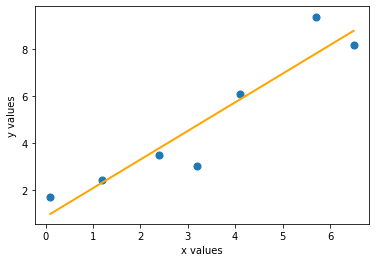

In [33]:
# Plot of best fit line & data
plt.scatter(x5,y5,s=50)
plt.plot(x5,regr.predict(x5), color='orange', linewidth=2)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [34]:
# y_hat = theta0 + theta1 * x 
yhat = 0.8475351486029536 + 1.2227264637835915 * x5
print('Estimates y values(y_hat): \n', y_hat)
print('Actual y values: \n', y5)

NameError: name 'y_hat' is not defined

In [ ]:
# Challenge: mse(y,yhat)

def mse(y, yhat):
    mse_calc = np.average((y-yhat)**2, axis=0)
    #return sum((y-yhat)**2)/y.size
    return mse_calc
    

In [ ]:
print('Manually Calculated MSE: ', mse(y5,yhat))
print('MSE from sklearn: ', mean_squared_error(y5, regr.predict(x5)))

# MSE Cost Function 3D Plot  
### Cost function depends on theta values

In [ ]:
# Make thetas Data

nr_thetas = 200
thet0 = np.linspace(start=-1, stop=3, num=nr_thetas)
thet1 = np.linspace(start=-1, stop=3, num=nr_thetas)

plot_t0, plot_t1 = np.meshgrid(thet0, thet1)

In [ ]:
# calc MSE with nested for loops
plot_cost = np.zeros((nr_thetas,nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        yhat = plot_t0[i][j] + plot_t1[i][j]*x5
        plot_cost[i][j] = mse(y5,yhat)
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

In [ ]:
# plot MSE 
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0,plot_t1,plot_cost, cmap="cool")
plt.show()

In [ ]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j): ', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

## MSE Partial derivatives w.r.t $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$$

In [ ]:
# INPUTS: X Values, Y Values, Theta Params Array
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [ ]:
learning_rate = 0.01
thetas = np.array([2.9,2.9])

plot_vals = thetas.reshape(1,2)
mse_vals = mse(y5,thetas[0]+thetas[1]*x5)


for i in range(1000):
    thetas = thetas - learning_rate * grad(x5, y5, thetas)   
    # Append new vals to nparray
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y5,thetas[0]+thetas[1]*x5))

# Results
print('Min Occurs At Theta 0: ', thetas[0])
print('Min Occurs At Theta 1: ', thetas[1])
print('MSE: ', mse(y5,thetas[0]+thetas[1]*x5))

In [ ]:
# plot MSE 
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, c='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap="cool", alpha=0.8)
plt.show()